Get the prerequisites done

In [9]:
!pip freeze | grep "tensorflow\|keras\|pydot"

keras-nightly==2.5.0.dev2021032900
keras-vis==0.4.1
pydot==1.3.0
pydot-ng==2.0.0
pydotplus==2.0.2
tensorflow==2.5.0
tensorflow-datasets==4.0.1
tensorflow-estimator==2.5.0
tensorflow-gcs-config==2.5.0
tensorflow-hub==0.12.0
tensorflow-metadata==1.0.0
tensorflow-probability==0.12.1


In [10]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [12]:
from tensorflow.keras import backend as K
print(K.epsilon())

1e-07


# Collab settings

In [14]:
import os
gce=False
if 'NO_GCE_CHECK' in os.environ:
  gce = True
if gce:
  from google.colab import drive
  drive.mount('/content/drive')
  os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks'
else:
  pass

Mounted at /content/drive


# MNIST dataset

In [18]:
'''
# https://stackoverflow.com/questions/7075082/what-is-future-in-python-used-for-and-how-when-to-use-it-and-how-it-works
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
'''

'\n# https://stackoverflow.com/questions/7075082/what-is-future-in-python-used-for-and-how-when-to-use-it-and-how-it-works\nfrom __future__ import absolute_import\nfrom __future__ import division\nfrom __future__ import print_function\n'

In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [17]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [19]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [20]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [21]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


In [26]:
images.shape, labels.shape

((25, 28, 28), (25,))

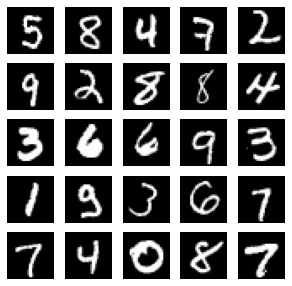

In [22]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')


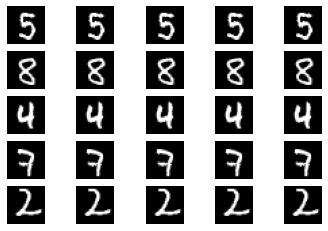

In [48]:
f, axs = plt.subplots(nrows=5,ncols=5)
for i in range(images.shape[0]//5):
  for j in range(images.shape[0]//5):
    axs[i][j].imshow(images[i], label=labels[i], cmap='gray')
    axs[i][j].axis('off')

In [36]:
images[1].shape, labels[1]

((28, 28), 8)